## 4. テキストの基本統計と視覚化
テキスト分析では、語、文節、句などの頻度を分析することが基本となる。   
### 4.1 要素の単純集計と視覚化
ここでは、例として、A大学、B大学で学長が新入生に向けたメッセージを取り上げる。  
これを形態素解析し、その中から名詞の一部を集計したデータを示す。

In [1]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/TwoPres.csv', encoding='shift-jis')
d1.columns = ['語', '頻度_A大学','頻度_B大学']

d1['相対頻度_A大学(%)'] = d1['頻度_A大学'] / d1['頻度_A大学'].sum()*100
d1['相対頻度_B大学(%)'] = d1['頻度_B大学'] / d1['頻度_B大学'].sum()*100
d1

,語,頻度_A大学,頻度_B大学,相対頻度_A大学(%),相対頻度_B大学(%)
0,世界,11,7,4.867257,4.268293
1,社会,9,4,3.982301,2.439024
2,研究,8,3,3.539823,1.829268
3,教育,9,1,3.982301,0.609756
4,力,5,1,2.212389,0.609756
...,...,...,...,...,...
221,開花,1,0,0.442478,0.000000
222,階層,1,0,0.442478,0.000000
223,領域,0,1,0.000000,0.609756
224,顕在,0,1,0.000000,0.609756


#### 棒グラフ
使用頻度の高い順から上位30語を棒グラフに示す。  
両大学とも「世界」という単語が1位となっている点はおなじである。  
しかし、A大学では「教育」「研究」「学生」が上位5位に入っているのに対し、  
B大学では「教育」が30位、「研究」が8位、「学生」が28位になっており、大きな相違が見受けられる。

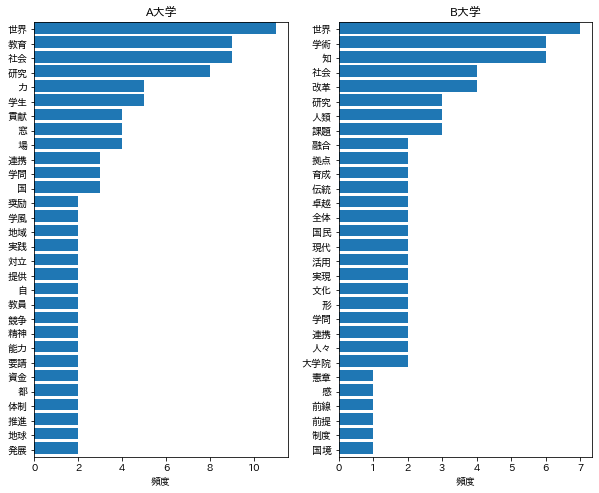

In [27]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

def set_axis(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels, ylim):
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    if xticklabels is not None:
        ax.set_xticks(xticks);
        ax.set_xticklabels(xticklabels, rotation=90) 
    if yticklabels is not None:
        ax.set_yticks(yticks);
        ax.set_yticklabels(yticklabels)
    ax.set_ylim(ylim);

fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(5*2, 8))

d1A = d1.sort_values(by=['頻度_A大学'], ascending=False)
axes[0].barh(y=np.arange(30), width=d1A[:30].頻度_A大学, align='edge');
set_axis(axes[0], title='A大学', xlabel='頻度', ylabel=None, xticks=None, yticks=np.arange(0.5,30.5), xticklabels=None, yticklabels=d1A[:30].語.values, ylim=[30,0])

d1B = d1.sort_values(by=['頻度_B大学'], ascending=False)
axes[1].barh(y=np.arange(30), width=d1B[:30].頻度_B大学, align='edge');
set_axis(axes[1], title='B大学', xlabel='頻度', ylabel=None, xticks=None, yticks=np.arange(0.5,30.5), xticklabels=None, yticklabels=d1B[:30].語.values, ylim=[30,0])

1つのグラフにまとめると比較しやすい、また頻度ではなく相対頻度を用いる。

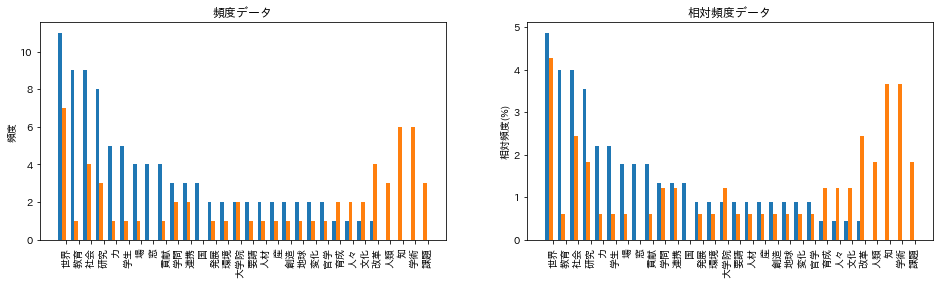

In [31]:
d1_30 = d1[:30].sort_values(['頻度_A大学'], ascending=False)

fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(8*2, 4))

axes[0].bar(x=np.arange(30), height=d1_30.頻度_A大学, width=0.3, label='A大学')
axes[0].bar(x=np.arange(0.3, 30.3), height=d1_30.頻度_B大学, width=0.3, label='B大学')
set_axis(axes[0], title='頻度データ', xlabel=None, ylabel='頻度', xticks=np.arange(0.5,30.5), yticks=None, xticklabels=d1_30[:30].語.values, yticklabels=None, ylim=None)

axes[1].bar(x=np.arange(30), height=d1_30['相対頻度_A大学(%)'], width=0.3, label='A大学')
axes[1].bar(x=np.arange(0.3, 30.3), height=d1_30['相対頻度_B大学(%)'], width=0.3, label='B大学')
set_axis(axes[1], title='相対頻度データ', xlabel=None, ylabel='相対頻度(%)', xticks=np.arange(0.5,30.5), yticks=None, xticklabels=d1_30[:30].語.values, yticklabels=None, ylim=None)

 両メッセージにおける使用頻度の差異が顕著である30語の棒グラフを示す。

In [198]:
import scipy.stats as st

def zscore(df):
    dfc = df.copy()
    x = dfc.iloc[:,1]
    y = dfc.iloc[:,2]
    xsum = np.sum(x)
    ysum = np.sum(y)
    
    xp = x / xsum
    yp = y / ysum
    
    dfc['xp'] = xp*100
    dfc['yp'] = yp*100
    
    p = (x+y) / (xsum + ysum)
    sigma = np.sqrt(p*(1-p)*(1/xsum + 1/ysum))
    dfc['z-score'] = np.abs(xp - yp) / sigma
    dfc['p-value'] = dfc['z-score'].map(lambda x: 2*(1-st.norm.cdf(x)))
    
    return dfc.sort_values(['z-score'], ascending=False)

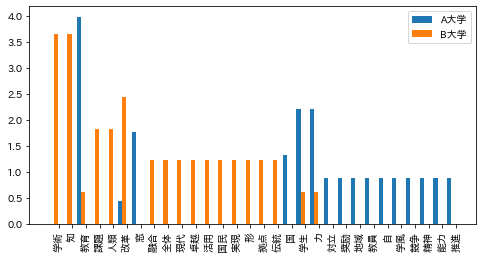

In [203]:
d1_z = zscore(d1)
d1_z_30 = d1_z[:30]

plt.figure(figsize=(8,4))

plt.bar(x=np.arange(30), height=d1_z_30['相対頻度_A大学(%)'], width=0.3, label='A大学')
plt.bar(x=np.arange(0.3, 30.3), height=d1_z_30['相対頻度_B大学(%)'], width=0.3, label='B大学')
plt.xticks(np.arange(0.5,30.5), d1_z_30[:30].語.values, rotation=90);
plt.legend();

#### ワードクラウド
語の使用頻度を、その語のサイズに比例させて示すものである。

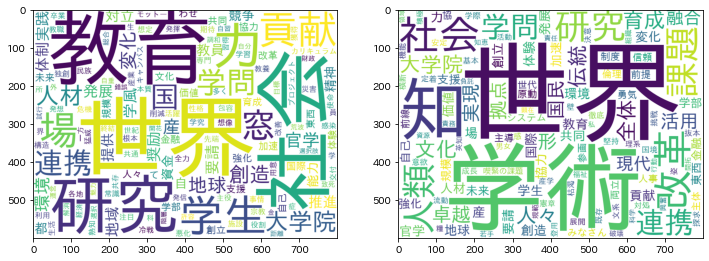

In [279]:
from wordcloud import WordCloud

word_listA = []
for i in range(len(d1)):
    word_listA += [d1.loc[i, '語']] * d1.loc[i, '頻度_A大学']
word_listA = ' '.join(word_listA)

word_listB = []
for i in range(len(d1)):
    word_listB += [d1.loc[i, '語']] * d1.loc[i, '頻度_B大学']
word_listB = ' '.join(word_listB)

fpath = "C:/Users/tanak/anaconda3/envs/tanaka_env1/Library/fonts/ipaexg.ttf"
wordcloudA = WordCloud(background_color="white",font_path=fpath,width=800,height=600,min_font_size=2, collocations = False)
wordcloudA.generate_from_text(word_listA)

wordcloudB = WordCloud(background_color="white",font_path=fpath,width=800,height=600,min_font_size=2, collocations = False)
wordcloudB.generate_from_text(word_listB)


fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].imshow(wordcloudA);
axes[1].imshow(wordcloudB);

#### 格子グラフ
格子グラフは、語句とテキストを縦線と横遷移対応させ、それらが交差する点にテキストに出現した語句の相対頻度を印や色で示す方法である。  

In [289]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/grid_plot_data.csv', encoding='shift-jis')
d2 = d2.rename(columns={'Unnamed: 0': '語'})

d2.iloc[:,1:] = d2.iloc[:,1:] / d2.iloc[:,1:].sum()*100
d2

,語,A大学,B大学,C大学,D大学,E大学,F大学,G大学
0,研究,3.111111,1.863354,5.056180,8.083832,2.409639,4.803493,2.919708
1,大学,4.888889,0.000000,3.932584,6.137725,2.409639,3.930131,2.919708
2,社会,4.000000,2.484472,0.561798,2.395210,3.212851,1.746725,2.919708
3,教育,4.000000,0.621118,2.808989,2.694611,1.204819,2.183406,2.189781
4,世界,4.888889,4.347826,1.685393,0.000000,4.417671,2.183406,0.729927
5,国際,0.444444,0.621118,0.561798,1.497006,2.811245,1.746725,0.000000
6,学生,2.222222,0.621118,1.685393,0.898204,1.606426,1.310044,1.459854
7,人材,0.888889,0.621118,0.561798,0.598802,3.212851,0.873362,0.729927
8,連携,1.333333,1.242236,0.000000,1.047904,1.606426,0.000000,1.459854
9,本学,0.000000,0.000000,2.808989,1.047904,0.401606,1.310044,0.000000


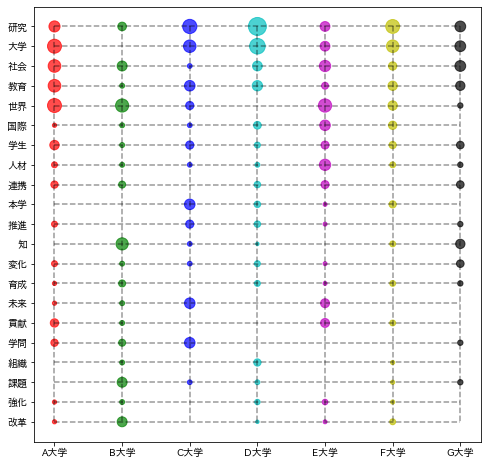

In [391]:
x1 = np.arange(21)
x2 = np.arange(7)

xx1, xx2 = np.meshgrid(x1, x2)

s = np.array(d2.iloc[:21,1:]).T.ravel()*40

colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
c = list(map(lambda x: colorlist[x], list(np.repeat(np.arange(7), 21).ravel())))

plt.figure(figsize=(8,8))

plt.scatter(xx2,xx1,s=s, color=c, alpha=.7);
plt.vlines(x2, 0, 20, linestyles='--', color='black', alpha=.4);
plt.hlines(x1, 0, 6, linestyles='--', color='black', alpha=.4);
plt.xticks(np.arange(0,7), d2.columns[1:]);
plt.yticks(np.arange(0,21), d2[:21].語.values);
plt.ylim([21,-1]);

また、各セルが対応する値の大きさが色の濃淡で示される、ヒートマップ(レベルプロット)で作成することもできる。

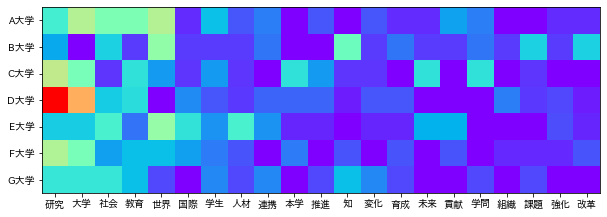

In [410]:
plt.figure(figsize=(10,20))

plt.imshow(np.array(d2.iloc[:21,1:].T), cmap='rainbow')
plt.yticks(np.arange(0,7), d2.columns[1:]);
plt.xticks(np.arange(0,21), d2[:21].語.values);

### 4.2 記述統計量と視覚化
テキストマイニングでは、複数のテキストを1つのグループとして扱う場合がある。  
ここで、夏目漱石と泉鏡花の作品の助詞の使用状況について比較をする。  
データは20の作品で59の助詞が集計されたものである。

In [27]:
d3 = pd.read_csv('study/参考書/テキストアナリティクス/jyoshi.csv', encoding='shift-jis')
d3 = d3.rename(columns={'Unnamed: 0': 'タイトル'})

d3.iloc[:,1:] = (d3.iloc[:,1:].T / d3.iloc[:,1:].sum(axis=1).T*100).T

d3

,タイトル,を.格助詞,は.副助詞,の.接続助詞,と.格助詞,に.格助詞,が.格助詞,も.副助詞,で.格助詞,か.接続助詞,...,けれども.接続助詞,より.接続助詞,っと.格助詞,つつ.接続助詞,こそ.副助詞,ぐらい.副助詞,しか.副助詞,やら.接続助詞,なあ.終助詞,OTHERS
0,夏目漱石_三四郎,12.800476,14.069814,12.911543,11.011503,10.983737,9.861166,3.550179,3.284411,2.907576,...,0.083300,0.055534,0.007933,0.071400,0.019833,0.083300,0.067434,0.027767,0.047600,0.269734
1,夏目漱石_吾輩は猫である,12.057618,12.609364,11.710806,11.760069,10.457555,8.193426,4.360763,3.217861,3.036573,...,0.049263,0.068968,0.047293,0.039410,0.045322,0.001971,0.057145,0.021676,0.049263,0.470955
2,夏目漱石_坊っちゃん,11.906475,12.618705,9.913669,11.906475,9.158273,8.942446,4.064748,3.733813,3.028777,...,0.086331,0.100719,0.050360,0.000000,0.035971,0.251799,0.043165,0.007194,0.014388,0.410072
3,夏目漱石_坑夫,11.018818,11.422404,10.648083,12.093482,10.671547,9.798677,5.011967,3.773054,2.637383,...,0.051621,0.145478,0.042236,0.018771,0.079778,0.032850,0.070393,0.103243,0.061007,0.370735
4,夏目漱石_夢十夜,14.251969,11.732283,14.212598,11.811024,11.141732,10.393701,2.992126,3.622047,2.047244,...,0.078740,0.078740,0.118110,0.000000,0.000000,0.039370,0.000000,0.078740,0.039370,0.078740
5,夏目漱石_文鳥,18.042453,13.620283,13.030660,10.672170,11.438679,8.372642,3.360849,2.830189,1.179245,...,0.000000,0.000000,0.000000,0.058962,0.000000,0.176887,0.117925,0.058962,0.117925,0.117925
6,夏目漱石_琴のそら音,11.507246,10.782609,11.101449,13.217391,10.086957,8.985507,3.971014,2.811594,4.086957,...,0.000000,0.086957,0.028986,0.144928,0.000000,0.028986,0.086957,0.000000,0.028986,0.318841
7,夏目漱石_草枕,12.434776,12.273095,14.257368,10.171235,12.743441,9.105607,4.637319,2.675094,3.064599,...,0.007349,0.066142,0.066142,0.102888,0.080841,0.029397,0.044095,0.073492,0.058793,0.580584
8,夏目漱石_虞美人草,13.582578,14.476334,12.956319,9.972936,12.449648,7.430136,3.578172,2.319361,3.018001,...,0.110146,0.053499,0.103852,0.094411,0.138469,0.050352,0.047205,0.044058,0.031470,0.371349
9,夏目漱石_野分,13.759180,14.507413,12.525980,9.138146,11.549120,8.022724,3.755023,2.424830,3.228488,...,0.076209,0.076209,0.103921,0.069281,0.103921,0.062353,0.103921,0.062353,0.096993,0.457254


このサイズであると棒グラフだと比較がしずらいので、基本統計量の確認を行う。

In [483]:
d3['作者'] = d3['タイトル'].str.split('_').map(lambda x: x[0])

d3.groupby('作者').describe()['は.副助詞']

,count,mean,std,min,25%,50%,75%,max
作者,,,,,,,,
夏目漱石,10.0,12.811230,1.310805,10.782609,11.867486,12.614034,13.957431,14.507413
泉鏡花,10.0,8.934852,0.932334,7.420050,8.304364,8.929769,9.673050,10.291935


四分位数などは**箱ひげ図**で視覚化することができる。  
箱ひげ図とは、長方形の箱の両端に線(ひげ)をつなげたグラフである。  
長方形の両端はそれぞれ25%点と75%点を示し、長方形の中にある線は50%点を示す。  
通常、両端のひげの長さは、箱の長さの1.5倍以内の最小値と最大値を示す。

<AxesSubplot:xlabel='作者', ylabel='は.副助詞'>

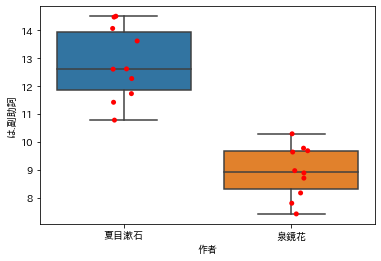

In [453]:
sns.boxplot(x='作者', y='は.副助詞', data=d3)
sns.stripplot(x='作者', y='は.副助詞', data=d3, color = 'red')

使用上位15語の箱ひげ図を示す。  
あきらかに差が見られるのは、「は.副助詞」と「の.接続助詞」であることがわかる。

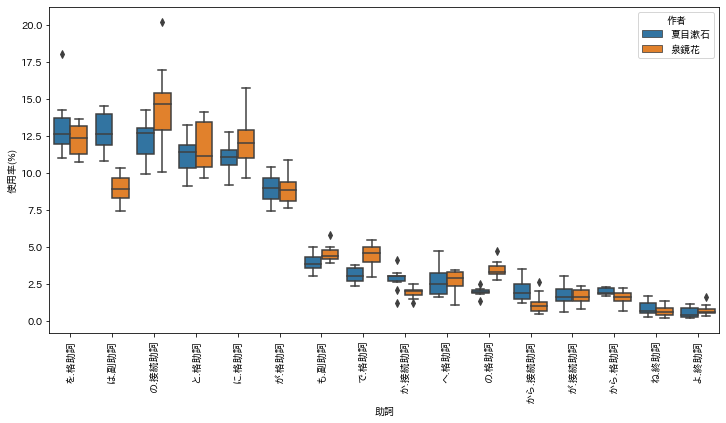

In [497]:
d3_17 = d3.loc[:,list(d3.columns[:17]) + ['作者']].melt(id_vars=['作者', 'タイトル'], 
                            var_name='助詞', 
                            value_name='使用率(%)')


plt.figure(figsize=(12,6))

sns.boxplot(x='助詞', y='使用率(%)', hue='作者', data=d3_17);

plt.xticks(rotation=90);

「は.副助詞」を横軸に、「の.格助詞」を縦軸とした散布図を示す。  
散布図の左上が泉鏡花の作品であり、その中でも「売色鴨南蛮」が、突出していることが確認できる。

(1.0, 5.0)

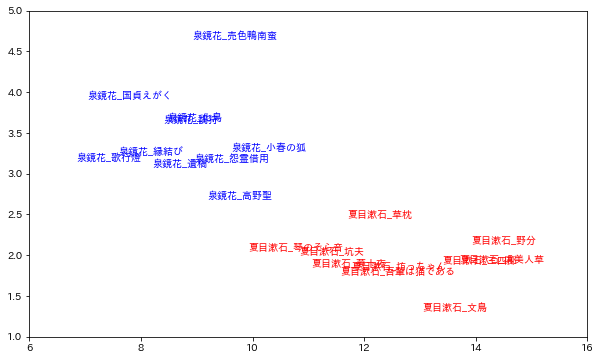

In [531]:
d3_hikaku = d3[['タイトル', 'は.副助詞', 'の.格助詞']]


plt.figure(figsize=(10,6))

c=['r']*10+['b']*10

[plt.text(x=d3_hikaku['は.副助詞'][i], y=d3_hikaku['の.格助詞'][i], s=d3_hikaku['タイトル'][i], color=c[i], ha='center', va='center') for i in range(len(d3_hikaku))];
plt.xlim(6,16)
plt.ylim(1,5)

### 4.3 推測統計と視覚化
母集団のすべてのテキストを集めることができない場合、標本データに基づいて、標本が属する集団の状況をいかに推測するかが大事である。  
#### 母集団と標本
調査対象に対して漏れなく行う調査を全数調査といい、調査対象の集団から一部を抽出して行う調査を標本調査という。  
調査対象全体を母集団、全体から一部を抽出して行う調査を標本調査という。  
調査対象全体を母集団、全体から一部を取り出したものを標本、あるいはサンプルと呼ぶ。  
取り出した個数を標本の大きさ、あるいは標本サイズと呼ぶ。  
標本抽出は、母集団を構成する要素に偏りがないようにしなければならない。  
均一の確率で抽出する方法を、無作為抽出法と呼ぶ。  
標本調査では、標本データの統計量を用いて母数を確率分布に基づいて推測する。  
標本データの統計量を用いて、その標本が属する母集団の母数を推測することを推定という。推定には、点推定と区間推定がある。   
点推定は、標本の統計量を母数と見なす推定方法である。  
区間推定は、標本データの統計量を用いて、母数が存在する区間を推定する。  
有意水準$\alpha$とし、確率分布の$100(1-\alpha)$%を収める範囲を決める必要がある。

#### 平均の区間推定
夏目漱石の10編の作品における「は.副助詞」の使用率の平均、標準偏差を求める。

In [554]:
d_ha = d3.loc[d3['作者']=='夏目漱石', ['は.副助詞']].T.values[0]
print(d_ha)
print("mean: ", d_ha.mean())
print("std: ", d_ha.std(ddof=1))

[14.06981357 12.60936392 12.61870504 11.42240368 11.73228346 13.62028302
 10.7826087  12.27309473 14.47633434 14.50741305]
mean:  12.811230349967033
std:  1.3108047871450716


夏目漱石の他の10編の作品について調べると、上記の値と一致する可能性は極めて低い。  
標本サイズ$n$が十分に大きければ、データ分布は標準正規分布に従うとみなすが、  
母集団の平均と標準偏差が未知で標本サイズが小さいときには、平均を推定するために$t$分布が用いられる。  
母集団の平均$\mu=0$、標準偏差$/sigma=1$のときの正規分布を標準正規分布と呼び、$N(0,1)$で表す。  
標本平均が$\bar{x}$だる正規分布は次の式で標準正規分布に変換することができる。  
$$
z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}
$$

一般的には$n$が25以上であれば、大きいと言われている。  
母平均$\mu$が区間$[\bar{x}-1.96\frac{\sigma}{\sqrt{n}},\bar{x}+1.96\frac{\sigma}{\sqrt{n}}]$に含まれる確率は0.95となる。  
この区間を母平均の95%の信頼区間と呼ぶ。  
標本サイズが小さいときには1.96の代わりに、上側確率と下側確率に対応するt分布の横軸の座標値を用いる。  
母集団の標準偏差$\sigma$が未知である場合、標本の標準偏差$s$を用いて$\sigma$を近似する方法をとる。  
「は.副助詞」の使用率の信頼区間のグラフを示す。

<ErrorbarContainer object of 3 artists>

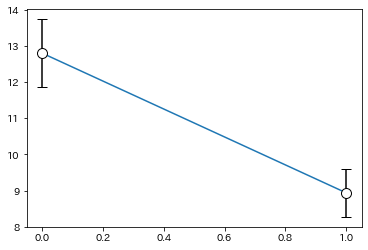

In [572]:
d3_suitei = d3[['作者', 'は.副助詞']]
d3_suitei = np.array(d3_suitei.groupby('作者').agg(['mean', 'std']))

plt.plot(np.arange(2), d3_suitei[:,0])
plt.errorbar(np.arange(2), d3_suitei[:,0], yerr = 2.26*d3_suitei[:,1]/np.sqrt(10), capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w')

出現回数上位15語に対して作成したものを示す。

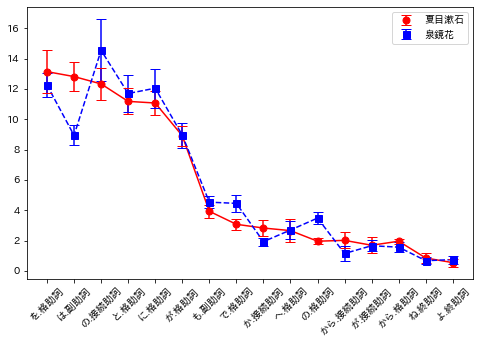

In [628]:
d3_17 = d3.loc[:,list(d3.columns[:17]) + ['作者']].melt(id_vars=['作者', 'タイトル'], 
                            var_name='助詞', 
                            value_name='使用率(%)')

d3_17_agg = d3_17.groupby(['作者', '助詞'], sort=False).agg(['mean', 'std']).reset_index(drop=False)

plt.figure(figsize=(8,5))

plt.plot(np.arange(len(d3_17_agg)/2),
         d3_17_agg.loc[d3_17_agg['作者']=='夏目漱石', ('使用率(%)','mean')],
         color='red')
plt.plot(np.arange(len(d3_17_agg)/2),
         d3_17_agg.loc[d3_17_agg['作者']=='泉鏡花', ('使用率(%)','mean')],
         color='blue',
         linestyle='--')

plt.errorbar(np.arange(len(d3_17_agg)/2),
             d3_17_agg.loc[d3_17_agg['作者']=='夏目漱石', ('使用率(%)','mean')],
             yerr = 2.26*d3_17_agg.loc[d3_17_agg['作者']=='夏目漱石', ('使用率(%)','std')]/np.sqrt(10),
             capsize=5, fmt='o', markersize=7,
             ecolor='red', markeredgecolor = "red", color='red',
             label='夏目漱石')

plt.errorbar(np.arange(len(d3_17_agg)/2),
             d3_17_agg.loc[d3_17_agg['作者']=='泉鏡花', ('使用率(%)','mean')],
             yerr = 2.26*d3_17_agg.loc[d3_17_agg['作者']=='泉鏡花', ('使用率(%)','std')]/np.sqrt(10),
             capsize=5, fmt='s', markersize=7,
             ecolor='blue', markeredgecolor = "blue", color='blue',
             label='泉鏡花')

plt.legend();
plt.xticks(np.arange(0,16), list(d3.columns[1:17]), rotation=45);

「は.副助詞」「で.格助詞」「の.格助詞」の信頼区間が重なっていない、これらは平均的に差があることを示唆する。

#### 帰無仮説検定とその統計量の活用
異なる標本データが同一の母集団に属しているかどうか、あるいはデータの変化傾向が同じであるかどうかについて、  
仮説を立て、その仮説を統計的に立証する方法として帰無仮説検定がある。  
1. 仮説(帰無仮説)およびそれに対立する仮説をセットとして立てる
2. 検定統計量が従う確率分布のもとで検定したい統計量(比率、平均、分散、相関など)に対応する検定統計量と$p$値を求める
3. 有意水準$\alpha$を基準として、$p$値が$\alpha$より大きいと仮説が採択され、&p&値が$\alpha$より小さいと仮説が棄却されると判断する  

仮説検定は、対立仮説の取り方によって両側検定と片側検定に分けられる。

#### 平均の差の検定
「は.副助詞」の使用率の平均を考える。  

In [644]:
d3_suitei = d3[['作者', 'は.副助詞']]
d3_suitei = d3_suitei.groupby('作者').agg(['mean', 'std'])['は.副助詞']

d3_suitei['var'] = d3_suitei['std']**2
d3_suitei

,mean,std,var
作者,,,
夏目漱石,12.811230,1.310805,1.718209
泉鏡花,8.934852,0.932334,0.869247


標本サイズが小さいため、t分布を用いることにする。  
平均の差の**t検定**の統計量は次の式を用いて求める。
$$
t=\frac{\bar{x}_A-\bar{x}_B-(\mu_A-\mu_B)}{s\sqrt{1/n_A+1/n_B}}
$$

ここで、$\bar{x}_A$、$\bar{x}_B$はそれぞれの標本の平均、$n_A$、$n_B$はそれぞれの標本サイズである。  
今回は両側検定、夏目漱石の母平均$\mu_A$は、泉鏡花の母平均$\mu_B$と同じであると仮定する。  
よって、分子は標本平均の差だけとなる。  
$$
s^2=\frac{(10-1)×1.72+(10-1)×0.87}{10+10-2}\risingdotseq1.14^2\\
t=\frac{12.81-8.94}{1.14\sqrt{1/10+1/10}}\risingdotseq7.59
$$

自由度は次の式で求める。  
$$
df=\biggl(\frac{s_A^2}{n_A^2}+\frac{s_B^2}{n_B^2}\biggr)÷\biggl(\frac{(s_A^2/n_A)^2}{n_A-1}+\frac{(s_B^2/n_B)^2}{n_B-1}\biggr)\risingdotseq16.25
$$

四捨五入し、自由度を16とすると、自由度を16のt分布における7.59の上側確率は$15.4×10^{-7}$である。  
得られた$p$値は0.05よりかなり小さい。  
よって、母平均が同じであるという帰無仮説が棄却され、両作家の「は.副助詞」の使用率には有意な差があるという結論になる。

#### 割合の検定
テキストデータのような質的データを統計的に分析する際には割合が多く用いられる。  
2つの割合の差の検定では、仮説$H_0:p_A=p_B$を検定する。  
両標本$A,B$における、ある項目の割合がそれぞれ$\hat{p}_A,\hat{p}_B$であり、標本サイズ$n_A,n_B$がいずれも大きいとき、検定統計量$z$は、
$$
z=\frac{\hat{p}_A-\hat{p}_B}{\sqrt{p(1-p)(1/n_A+1/n_B)}}
$$
で求められる。  
ここで、$p$は、両標本の割合の加重平均であり、次のように求められる。
$$
p=\frac{\hat{p}_An_A+\hat{p}_Bn_B}{n_A+n_B}
$$

In [674]:
nA = d1['頻度_A大学'].sum()
nB = d1['頻度_B大学'].sum()

d1['p'] = (d1['頻度_A大学']+d1['頻度_B大学']) / (nA+nB)
d1['z-value'] = np.abs(d1['頻度_A大学']/nA - d1['頻度_B大学']/nB) / np.sqrt(d1['p']*(1-d1['p'])*(1/nA + 1/nB))
d1['p-value'] = d1['z-value'].map(lambda x: 2*(1-st.norm.cdf(x)))
d1 = d1.sort_values('z-value', ascending=False)
d1

,語,頻度_A大学,頻度_B大学,相対頻度_A大学(%),相対頻度_B大学(%),p,z-value,p-value
6,学術,0,6,0.000000,3.658537,0.015385,2.897841,0.003757
7,知,0,6,0.000000,3.658537,0.015385,2.897841,0.003757
3,教育,9,1,3.982301,0.609756,0.025641,2.080053,0.037521
29,課題,0,3,0.000000,1.829268,0.007692,2.041126,0.041238
17,人類,0,3,0.000000,1.829268,0.007692,2.041126,0.041238
...,...,...,...,...,...,...,...,...
32,体験,1,1,0.442478,0.609756,0.005128,0.228306,0.819408
33,価値,1,1,0.442478,0.609756,0.005128,0.228306,0.819408
57,東西,1,1,0.442478,0.609756,0.005128,0.228306,0.819408
12,連携,3,2,1.327434,1.219512,0.012821,0.093519,0.925491


#### カイ2乗検定
3つ以上の標本間の差に関する統計量としては、カイ2乗値がある。カイ2乗分布は自由度に依存する。

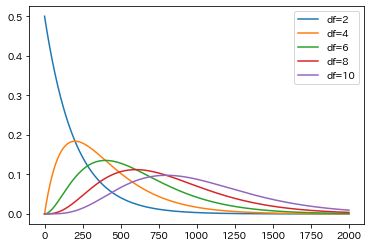

In [820]:
from scipy.stats import chi2

for i in np.array([2,4,6,8,10]):
    plt.plot(chi2.pdf(x=np.arange(0, 20, 0.01), df=i), label='df='+str(i))
plt.legend();

お互いに独立な標準正規分布に従う$m$個の確率変数$X_!,X_2,\cdots,X_m$がある場合、  
これらの2乗和が従う分布を自由度$m$の**カイ2乗分布**と呼ぶ。  
例えば、2つの大学の学長メッセージについて、「世界」という語のみを考慮するとき、次のようにまとめることができる。  

In [721]:
d1.loc[d1['語']=='世界', '世界'] = '世界'
d1.loc[d1['語']!='世界', '世界'] = 'その他'
table1 = d1.groupby(['世界']).sum()[['頻度_A大学', '頻度_B大学']].T
table1

世界,その他,世界
頻度_A大学,215,11
頻度_B大学,157,7


このような2行2列の表を2×2の分割表と呼ぶ。  
自由度は、$(2-1)×(2-1)$で求められ、自由度1となる。  
2×2の分割表の一般形式を示す。

||$$b_1$$|$$b_2$$|横の合計|
|-|-|-|-|
|$$a_1$$|$$n_{11}$$|$$n_{12}$$|$$n_{1+}$$|
|$$a_2$$|$$n_{21}$$|$$n_{22}$$|$$n_{2+}$$|
|縦の合計|$$n_{+1}$$|$$n_{+2}$$|$$n_{++}$$|

次のように求めた値は、近似的に自由度1のカイ2乗分布に従うことが知られている。
$$
\chi^2=\frac{n_{++}(n_{11}n_{22}-n_{12}n_{21})^2}{n_{1+}n_{2+}n_{+1}n_{+2}}
$$

カイ2乗分布により近似をするため、**イェーツの補正**と呼ばれる方法が提唱されている。
$$
\chi_Y^2=\frac{n_{++}(|n_{11}n_{22}-n_{12}n_{21}|-0.5n_{++})^2}{n_{1+}n_{2+}n_{+1}n_{+2}}
$$

In [750]:
n11 = table1.iloc[0,0]
n12 = table1.iloc[0,1]
n21 = table1.iloc[1,0]
n22 = table1.iloc[1,1]
n1p = table1.iloc[0,:].sum()
n2p = table1.iloc[1,:].sum()
np1 = table1.iloc[:,0].sum()
np2 = table1.iloc[:,1].sum()
npp = table1.sum().sum()

chi22 = npp*(np.abs(n11*n22-n12*n21)-0.5*npp)**2/(n1p*n2p*np1*np2)
chi22

0.0011455773100408709

この値の上側確率は約0.973であり、有意水準0.05よりかなり大きい。  
「世界」という語が使用される相対頻度の比率はほぼ一定していることを示す。  
このような検定を**カイ2乗検定(独立性検定)**と呼ぶ。  
  
2行2列に限らず、より大きな評も扱うことが可能である。  
表側の変数が$I$個、表頭の変数が$J$個に分かれている2元分割表では、自由度は$(I-1)×(J-1)$により求められる。

2元分割表の分析に用いる統計量の中でもっとも広く知られているのは、ピアソンのカイ2乗統計量である。
$$
\chi^2=\sum_{i=1}^I\sum_{j=1}^J\frac{(n_{ij}-e_{ij})^2}{e_{ij}}
$$
この式で得られた統計量は、自由度$(I-1)×(J-1)$のカイ2乗分布に従うことが知られている。  
$n_{ij}$は分割表の$i$行$j$列のセルの頻度であり、$e_{ij}$は$i$行$j$列のセルの**期待頻度**である。  
期待頻度は、$i$行の和$n_{i+}$、$j$列の和$n_{+j}$、分割表の頻度の総合計$n$を用いて求められる。
$$
e_{ij}=\frac{n_{i+}n_{+j}}{n}
$$

また、**尤度比統計量**も用いることが可能である。  
$$
G^2=2\sum_{i=1}^I\sum_{j=1}^Jn_{ij}\log{\frac{n_{ij}}{e_{ij}}}
$$
尤度比統計量$G^2$は、自由度$(I-1)×(J-1)$のカイ2乗分布に従う。  


In [840]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/grid_plot_data.csv', encoding='shift-jis')
d2 = d2.rename(columns={'Unnamed: 0': '語'})

d2_kenkyu = pd.concat([d2.loc[d2['語']=='研究'].sum()[1:],
                       d2.loc[d2['語']!='研究'].sum()[1:]], axis=1)#.T
d2_kenkyu.columns = ['研究', 'その他']
d2_kenkyu = d2_kenkyu.T
d2_kenkyu

,A大学,B大学,C大学,D大学,E大学,F大学,G大学
研究,7,3,9,54,6,11,4
その他,218,158,169,614,243,218,133


In [852]:
npj = d2_kenkyu.sum()
npj = np.matrix(npj)
nip = d2_kenkyu.sum(axis=1)
nip = np.matrix(nip)
npp = d2_kenkyu.sum().sum()

eij = nip.T@npj/npp

chi = (d2_kenkyu - eij)**2 / eij
chi

,A大学,B大学,C大学,D大学,E大学,F大学,G大学
研究,1.730103,3.292216,0.000384,11.769652,3.513252,0.036764,1.267154
その他,0.092772,0.176536,0.000021,0.631117,0.188389,0.001971,0.067948


In [854]:
X_squared = chi.sum().sum()
print(X_squared)
print(1-chi2.cdf(x=X_squared, df=6))

22.7682793185047
0.0008779205083415675


カイ2乗値は22.768で、自由度は$(2-1)×(7-1)=6$であり、これらに対応する$p$値は0.0009である。  
このような計算をすべての語に対して行い、差異の大きい順に並べ替える。

In [858]:
def calc_chi(df, target):
    dfc = df.copy()
    dfc2 = pd.concat([dfc.loc[dfc['語']==target].sum()[1:],
                           dfc.loc[dfc['語']!=target].sum()[1:]], axis=1)#.T
    dfc2.columns = [target, 'その他']
    dfc2 = dfc2.T
    
    npj = dfc2.sum()
    npj = np.matrix(npj)
    nip = dfc2.sum(axis=1)
    nip = np.matrix(nip)
    npp = dfc2.sum().sum()

    eij = nip.T@npj/npp

    chi = (dfc2 - eij)**2 / eij
    X_squared = chi.sum().sum()
    return 1-chi2.cdf(x=X_squared, df=6)

In [875]:
res = pd.DataFrame({"語":d2['語'].values,
                    "p_value":[calc_chi(d2, target=s) for s in d2['語'].values]})
res.sort_values('p_value').head()

,語,p_value
4,世界,0.000004
11,知,0.000086
14,未来,0.000152
16,学問,0.000365
0,研究,0.000878


### 4.4 統計的法則と指標
#### ジップの法則
テキストに使用された要素の頻度を集計し、頻度が高い順に並べると、その順位と頻度の間には次の法則があることが知られている。  
$$
順位×頻度\risingdotseq定数
$$
この法則を**ジップの法則**と呼ぶ。  
頻度、順位、定数をそれぞれ$f,r,c$で表すと、ジップの法則は次の式で表される。
$$
f_r\risingdotseq \frac{c}{r},\ r=1,2,3,\cdots,n
$$

In [882]:
d4 = pd.read_csv('study/参考書/テキストアナリティクス/FUKUDA.csv', encoding='shift-jis')
d4 = d4.rename(columns={'福田': 'f'})

d4['r'] = np.arange(len(d4))+1
d4['fxr'] = d4['f'] * d4['r']
d4['x'] = np.log(d4['r'])
d4['y'] = np.log(d4['f'])
d4

,Words,f,r,fxr,x,y
0,の_助詞,243,1,243,0.000000,5.493061
1,を_助詞,194,2,388,0.693147,5.267858
2,に_助詞,151,3,453,1.098612,5.017280
3,ます_助動詞,78,4,312,1.386294,4.356709
4,し_動詞,74,5,370,1.609438,4.304065
...,...,...,...,...,...,...
923,議定_名詞,1,924,924,6.828712,0.000000
924,点検_名詞,1,925,925,6.829794,0.000000
925,規範_名詞,1,926,926,6.830874,0.000000
926,一致_名詞,1,927,927,6.831954,0.000000


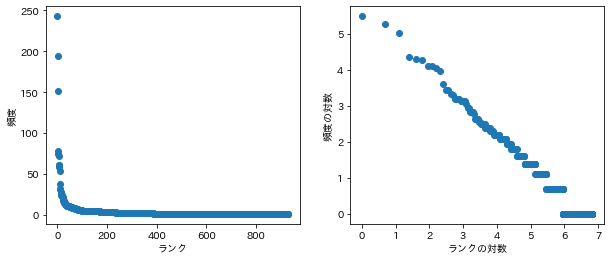

In [892]:
fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].scatter(d4['r'], d4['f']);
axes[0].set_xlabel('ランク');
axes[0].set_ylabel('頻度');

axes[1].scatter(d4['x'], d4['y']);
axes[1].set_xlabel('ランクの対数');
axes[1].set_ylabel('頻度の対数');

$r×ｆ$は一定ではない、上の図からデータが大まかに直線で近似することが分かる。  
そこで、ジップの法則を次のように拡張した法則が提案されている。
$$
f_r=\frac{c}{r^a},\ r=1,2,\cdots,n
$$
$a,c$は、データに依存する定数である。  
式を変形すると、$\log{(f_r)}=\log{(c)}-a\log{(r)}$になる。  
従って、回帰分析の手法で定数を定めることが可能である。

[-0.86513325] 5.623543938470615


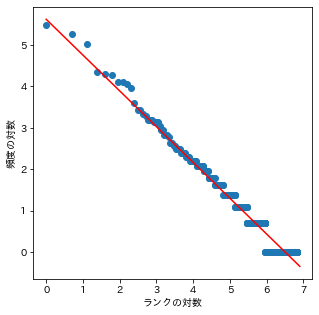

In [905]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(d4[['x']],  d4['y']);
print(lr.coef_, lr.intercept_)

x = np.arange(0,7,0.1)

plt.figure(figsize=(5,5))

plt.scatter(d4['x'], d4['y']);
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
plt.xlabel('ランクの対数');
plt.ylabel('頻度の対数');

#### 語彙の豊富さの指標
テキストの中に用いられた総単語数を**延べ語数**と呼び、単語の種類を**異なり語数**と呼ぶ。  
延べ語数を$N$、異なり語数を$V$、テキストの中で$m$回使用された語数を$V(m,N)$で示す。  
$m$と$V(m,N)$のデータを頻度スペクトルと呼ぶ。  
$N,V,V(m,N)$は、相互に次の関係を持っている。
$$
V=\sum_{all\ m}V(m,N)\\
N=\sum_{all\ m}mV(m,N)
$$

In [911]:
print("N: ", d4['f'].sum())
print("V: ", d4['f'].count())
print(d4.groupby(['f'])['f'].count())

N:  3423
V:  928
f
1      541
2      152
3       65
4       47
5       25
6       16
7       10
8       13
9       10
10       5
11       6
12       5
13       2
14       3
16       1
17       3
19       2
21       1
23       3
24       3
27       1
28       1
31       2
37       1
53       1
58       1
61       2
72       1
74       1
78       1
151      1
194      1
243      1
Name: f, dtype: int64


#### 延べ語数と異なり語数を用いた指標
一般的には、テキストの中に異なった単語が多く用いられていると、語彙が豊富であり、表現が多様であると考えられている。  
語彙の豊富さを示すもっとも簡単な指標は、延べ語数に対する異なり語数の比率
$$
TTR=\frac{V}{N}
$$
であり、これを**タイプ・トークン比**と呼ぶ。

#### 頻度スペクトルを用いた指標
**K特性値**という語彙の豊富さを示す指標がある。  
延べ語数が$N$、異なり語数が$V$である文章の中に、$m$回出現した単語数を$V(m,N)$とした場合、ユールのK特性値は次の式で定義される。  
$$
K=10^4\frac{\sum_{all\ m}m^2V(m,N)-N}{N^2}
$$
ユールのK特性値は、値が小さいほど、語彙が豊富であることを示す指標である。

In [937]:
N = d4['f'].sum()
V = d4['f'].count()

VmN = d4.groupby(['f'])['f'].count()
VmN =pd.DataFrame({'m':VmN.index,
                   'VmN':VmN}).reset_index(drop=True)
VmN_sum = np.sum(VmN['m']**2 * VmN['VmN'])

K = 10**4 * (VmN_sum - N)/(N**2)
K

141.26397795872964

ほかにも、Simpsonの
$$
D=\sum_{all\ m}V(m,N)\frac{m}{N}\frac{m-1}{N-1}
$$
Sichelの
$$
S=\frac{V(2,N)}{V(V)}
$$
Honoreの
$$
H=100\frac{\log{N}}{1-\frac{V(1,N)}{V(N)}}
$$
等の指標がある。  
いぜれも文章の量が少ない場合には、安定した値が得られない。